In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.io
import scaleogram as scg


In [2]:
keywords = ['Backward','Birds','Continue','Down','Forward', 'Four','Landing','Left','Light','Look','Off','On','One',
            'Reverse','Right','Rotate','Side','Snapshot','Stop','Task','Three','Two','Up']
sr = 40000
subject_number = 11

In [3]:
Alignment = pd.read_csv("Alignment_label_final.csv")

In [4]:
# remove the mannully revised or removed file
removed_alignment = Alignment[(Alignment['Manually_Revised']==True)|(Alignment['Manually_Removed']==True)]
removed_alignment = removed_alignment.reset_index()
removed_alignment


,index,subject,keyword,wav_index,Start,End,Label,Manually_Revised,Manually_Removed,fig_index,RICK_v2.0,RICK_v2.R
0,956,1,Snapshot,9,906600,966600,Train,True,False,8,NaN,NaN


In [5]:
new_Alignment =  Alignment[(Alignment['Manually_Removed']==False)]
new_Alignment = new_Alignment.reset_index(drop=True)
new_Alignment

,subject,keyword,wav_index,Start,End,Label,Manually_Revised,Manually_Removed,fig_index,RICK_v2.0,RICK_v2.R
0,1,Backward,1,37720,97720,Test,False,False,0,True,True
1,1,Backward,2,136840,196840,Val,False,False,1,True,True
2,1,Backward,3,235520,295480,Test,False,False,2,True,True
3,1,Backward,4,330760,390760,Test,False,False,3,True,True
4,1,Backward,5,423080,483080,Train,False,False,4,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13781,11,Up,50,4168760,4228720,Train,False,False,49,True,NaN
13782,11,Up,51,4256280,4316240,Test,False,False,50,True,True
13783,11,Up,52,4340120,4400120,Test,False,False,51,NaN,NaN
13784,11,Up,53,4428240,4488240,Train,False,False,52,True,NaN


In [6]:
scales = np.arange(5, 500)  #### change scale to change figure

In [7]:
s = 0 # s is the subject No., here from 0 to 10, set a No. to get this subject data, e.g., set s=0 to get subject 1 data
sub = str(s+1).zfill(2) # get the subject #
word = 'Continue' # word is the keyword, select one from the list of keywords

#get the mat file of this word from the subject s and get the labels of all segmentations
mat_path = '/data2/home/cou/yuli5/HCI_paper/sEMG_lab1208/subject_'+sub+'/'+word+'.mat'
mat = scipy.io.loadmat(mat_path)
labels = new_Alignment[(new_Alignment ["keyword"] == word)&(new_Alignment ["subject"] == s+1)]

Channel = 1 # there are 7 channels for sEMG data in this dataset, from 1,2,...7
c =  Channel - 1

# get the data of this channel in this word from the subject s 
if len(mat['tickrate'][0])>1:# just in case some files have a pause during recording
    for i in range(len(mat['tickrate'][0])): 
        s_data = mat['data'][0][int(mat['datastart'][c][i]):int(mat['dataend'][c][i])]
        s_data = np.transpose(s_data)
        data = np.append(data,s_data) if i > 0 else s_data
else:
    data = mat['data'][0][int(mat['datastart'][c]):int(mat['dataend'][c])]
    data = np.transpose(data)  
    


sEMG Scaleogram of Index 10 for subject #01, keyword of Continue, on Channel 1, the lable is Test.


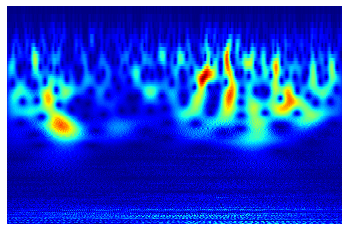

In [10]:
i = 10 # the index of the segmentation, i in range(len(labels)), in this dataset, i is from 0 to 50+
label = labels["Label"].values[i]  # to get the lable of the segment i, Train, Val, or Test

idnum = labels["wav_index"].values[i]-1  # the id of the output figure. 

signal = data[labels["Start"].values[i]:labels["End"].values[i]] # get the original signal data based on the start and end index

# decrease frequence to generate figure
low_data = []
for j in range(len(signal)//40):
    low_data.append(signal[j*40:(j+1)*40].mean())
low_data = np.array(low_data)

time = np.linspace(0, 1.5, num=len(low_data)) # 1.5 second per segment

print("sEMG Scaleogram of Index %d for subject #%s, keyword of %s, on Channel %d, the lable is %s."%(i,sub,word,Channel,label))
ax = scg.cws(time, low_data, scales, yaxis = 'frequency', yscale='log') # get the output figure
#     plt.savefig(filename, bbox_inches='tight',  pad_inches=0) # save figure if needed
